# Analysis of world_happiness database

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. 

I loaded and saved the dataset to a DataFrame object named `happy` and familiarised myself with its contents. 

In [ ]:
happy = pd.read_csv('data/world_happiness.csv')

In [ ]:
happy.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [ ]:
happy.describe()

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
count,142.000000,142.000000,135.000000,142.00000,143.000000,143.000000,143.000000
mean,77.352113,77.000000,73.244444,78.78169,20124.286713,73.796503,77.643357
std,45.743379,45.569058,42.237507,44.87921,20570.547556,7.092194,46.377418
min,1.000000,1.000000,1.000000,1.00000,631.000000,52.900000,0.000000
25%,37.250000,37.500000,37.500000,41.25000,4110.000000,69.100000,36.500000
50%,76.000000,75.500000,74.000000,80.50000,13000.000000,74.900000,79.000000
75%,116.750000,116.750000,109.500000,116.75000,29750.000000,79.650000,118.000000
max,155.000000,155.000000,148.000000,155.00000,113000.000000,85.100000,155.000000


In [ ]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


1. Using a histogram, plotted the distribution of the `happiness_score` variable.

<AxesSubplot: xlabel='happiness_score', ylabel='Count'>

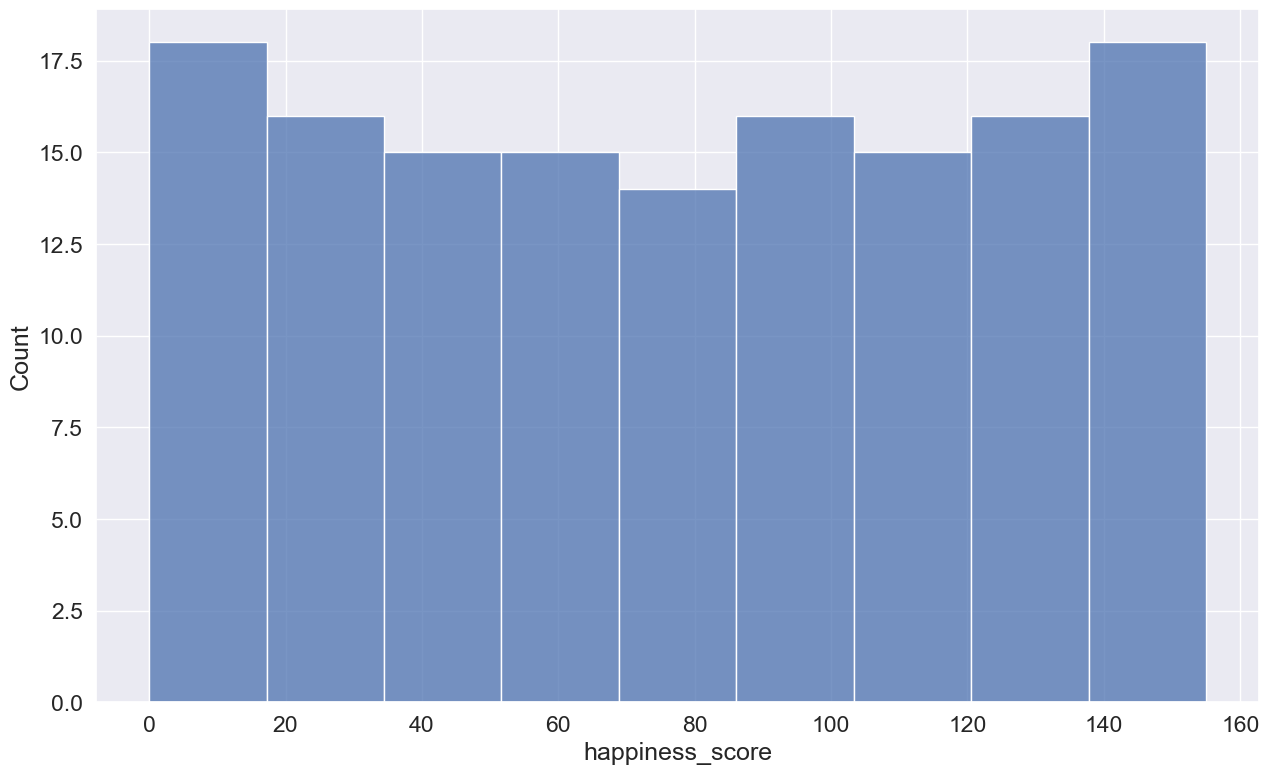

In [ ]:
sns.histplot(x = 'happiness_score', data = happy)

The distribution is uniform.

2. Plotted a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset to see which variables are most correlated to `happiness_score`.

C:\Users\flbon\AppData\Local\Temp\ipykernel_10436\3139864866.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(happy.corr(), vmin=-1, vmax=1, annot=True)


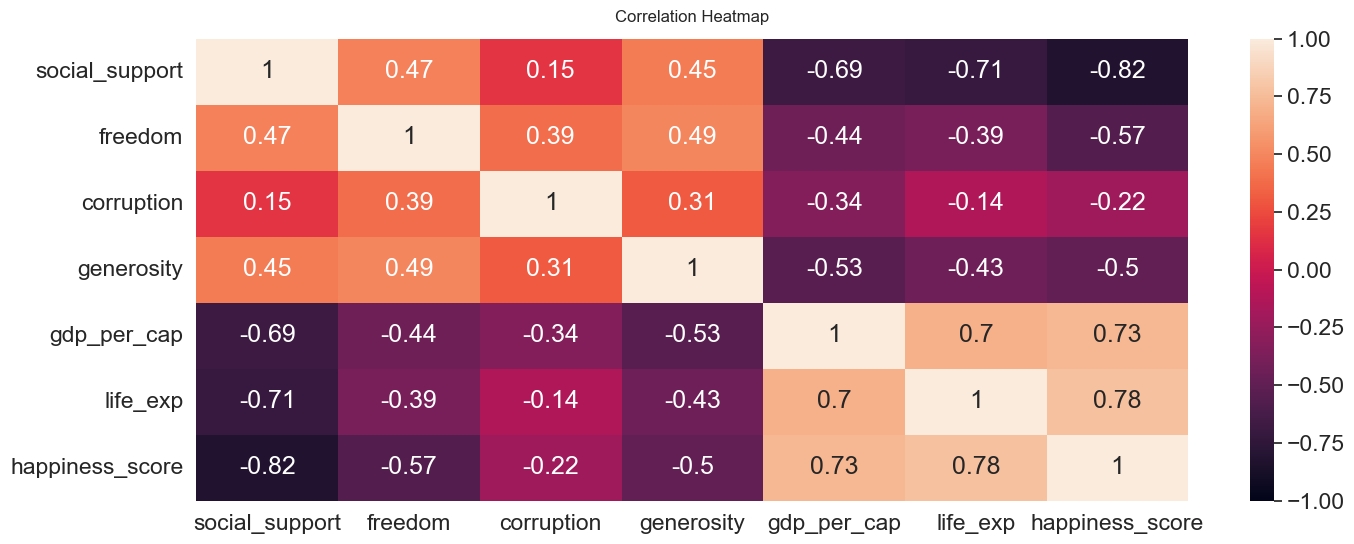

In [ ]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(happy.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Corruption is the least correlated variable.<br>
Life expectancy is the most directly correlated.<br>
Social support the most inversely correlated.

3. Noticed that the `corruption` metric has some missing values. Found out how many countries have a missing corruption value and replaced all missing values *in all columns of the DataFrame* with the *respective column's mean value*. 

In [ ]:
happy['corruption'].isna().sum()

In [ ]:
happy['corruption'] = happy['corruption'].fillna(happy['corruption'].mean())

In [ ]:
happy.head(25)

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.000000,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.000000,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.000000,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.000000,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.000000,7.0,50500,81.8,151
5,Switzerland,13.0,11.0,7.000000,16.0,59000,84.3,150
6,Sweden,25.0,10.0,6.000000,17.0,47200,82.8,149
7,New Zealand,5.0,8.0,5.000000,8.0,36500,81.9,148
8,Canada,20.0,9.0,11.000000,14.0,44200,82.2,147
9,Austria,31.0,26.0,19.000000,25.0,46900,82.0,146


4. Used the `statsmodel` package to create a linear regression model where I used `life_exp` to predict the `happiness_score`. <br>
Then I wondered how much the happiness score variable would increase with an increase of life expectancy of 1 year.

In [ ]:
Y = happy['happiness_score']
X = happy['life_exp']
X = sm.add_constant(data=X)   
model = sm.OLS(endog=Y, exog=X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     219.4
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.59e-30
Time:                        15:40:33   Log-Likelihood:                -683.97
No. Observations:                 143   AIC:                             1372.
Df Residuals:                     141   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.8710     25.536    -11.704      0.000    -349.355    -248.387
life_exp       5.1021      0.344     14.812      0.000       4.421       5.783
==============================================================================
Omnibus:                        7.539   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.120
Skew:                          -0.408   Prob(JB):                       0.0469
Kurtosis:                       2.400   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-298.8710,25.536,-11.704,0.000,-349.355,-248.387
life_exp,5.1021,0.344,14.812,0.000,4.421,5.783


In [ ]:
def lin_reg_coef(x, y): 
    
    # calculate the means of the X and Y variables
    X_mean = np.mean(x)
    Y_mean = np.mean(y)
    
    # calculate the deviations from the mean of each data point (for X and Y)
    X_mean_dev = [el-X_mean for el in x]
    Y_mean_dev = [el-Y_mean for el in y]
    
    # calculate the covariance between X and Y and the variance of X
    XY_covar = np.sum(np.array(X_mean_dev) * np.array(Y_mean_dev))
    X_var = np.sum(np.array(X_mean_dev)**2)
    
    # calculate the slope (b_1) and intercept (b_0) coefficients
    b_1 = XY_covar/X_var
    b_0 = Y_mean - b_1*X_mean
    
    return b_0, b_1

In [ ]:
intercept, slope = lin_reg_coef(x=happy['happiness_score'], y=happy['life_exp'])

print('Intercept:', intercept)
print('Slope:', slope)

Intercept: 64.53251208424538
Slope: 0.11931466918426645


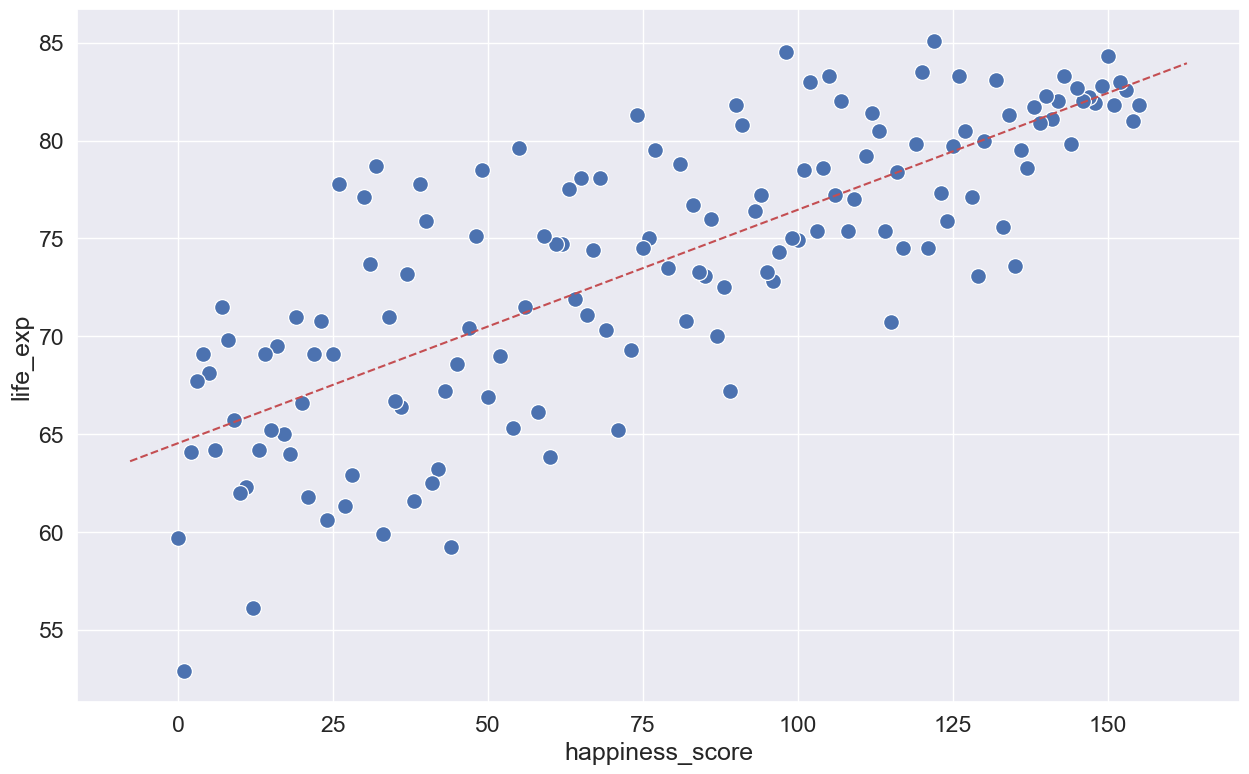

In [ ]:
sns.scatterplot(x='happiness_score', s=130, y='life_exp', data=happy)

axes = plt.gca()   
x_vals = np.array(axes.get_xlim())   
y_vals = intercept + (slope * x_vals)   
plt.plot(x_vals, y_vals, '--', color='r')
plt.show()

In [ ]:
n = random.randint(50,90)

a = results.predict(np.array([1, n]))
b = results.predict(np.array([1, n+1]))

In [ ]:
print("Every extra year of life expectancy increases happiness by", b[0]-a[0], "points.")

Every extra year of life expectancy increases happiness by 5.102062529735633 points.


5. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, trained a linear regression model where I predited the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(using a `random_state=42`)*. Calculated the R-squared on the train set and compared it with the R-squared based on the test set.

In [ ]:
happy=happy.dropna()

In [ ]:
y = happy['happiness_score']
X = happy[['social_support', 'freedom', 'generosity', 'life_exp']]
X = sm.add_constant(X)

In [ ]:
X

,const,social_support,freedom,generosity,life_exp
0,1.0,2.0,5.0,47.0,81.8
1,1.0,4.0,6.0,22.0,81.0
2,1.0,3.0,3.0,11.0,82.6
3,1.0,1.0,7.0,3.0,83.0
4,1.0,15.0,19.0,7.0,81.8
...,...,...,...,...,...
138,1.0,144.0,21.0,90.0,69.1
139,1.0,131.0,78.0,49.0,67.7
140,1.0,151.0,155.0,137.0,64.1
141,1.0,155.0,133.0,113.0,52.9


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     84.66
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           7.89e-29
Time:                        17:29:10   Log-Likelihood:                -399.70
No. Observations:                  90   AIC:                             809.4
Df Residuals:                      85   BIC:                             821.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -36.9112     37.224     -0.992      0.324    -110.922      37.100
social_support    -0.4810      0.074     -6.463      0.000      -0.629      -0.333
freedom           -0.1764      0.063     -2.801      0.006      -0.302      -0.051
generosity        -0.0153      0.065     -0.235      0.814      -0.144       0.114
life_exp           2.2396      0.445      5.031      0.000       1.354       3.125
==============================================================================
Omnibus:                        1.508   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                0.963
Skew:                          -0.046   Prob(JB):                        0.618
Kurtosis:                       3.498   Cond. No.                     2.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model = sm.OLS(y_test,X_test)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     42.02
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           8.15e-14
Time:                        17:29:13   Log-Likelihood:                -200.60
No. Observations:                  45   AIC:                             411.2
Df Residuals:                      40   BIC:                             420.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -48.1962     69.568     -0.693      0.492    -188.798      92.406
social_support    -0.4755      0.116     -4.110      0.000      -0.709      -0.242
freedom           -0.2113      0.087     -2.418      0.020      -0.388      -0.035
generosity        -0.0866      0.085     -1.014      0.317      -0.259       0.086
life_exp           2.5390      0.812      3.127      0.003       0.898       4.180
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.664
Skew:                          -0.282   Prob(JB):                        0.718
Kurtosis:                       2.809   Cond. No.                     3.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The train test's R-squared is slightly smaller than it was in the test set.<br>
Adjusted R-squared, on the other hand, is practically equal.<br>
I wouldn't reach any conclusion based on just the R-squared values, but I would look at least at the MAE as well.<br>

6. Using the same model from the previous question, **calculated the MAE on the testing set**.

In [ ]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [ ]:
pred_train = results.predict(X_train)

print('Naïve Training MAE:', mae(y_train, np.mean(y_train))) 
print('Training MAE:', mae(y_train, pred_train))

Naïve Training MAE: 39.64
Training MAE: 16.59


In [ ]:
pred_test = results.predict(X_test)

print('Naïve Testing MAE:', mae(y_test, np.mean(y_test))) 
print('Testing MAE:', mae(y_test, pred_test)) 

Naïve Testing MAE: 42.09
Testing MAE: 16.45


Because there is no big discrepancy between the two MAEs, I'd say the model doesn't overfit the data.

7. Strange: when looking at the regression coefficients of the model I noticed that it looks like freedom and generosity are inversely correlated to happiness.

8. Using the `prophet` library, this code fits an additive model (the effect of the seasonality is added to the trend in order to get forecasts) on a dataframe `df` which contains the number of airline passengers over time. I noticed how the seasonality in the forecast is too large at the start of the time series and too small at the end (compared to the data it tries to fit) and modified the code to fix this issue.

C:\Users\flbon\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
16:11:11 - cmdstanpy - INFO - Chain [1] start processing
16:11:12 - cmdstanpy - INFO - Chain [1] done processing


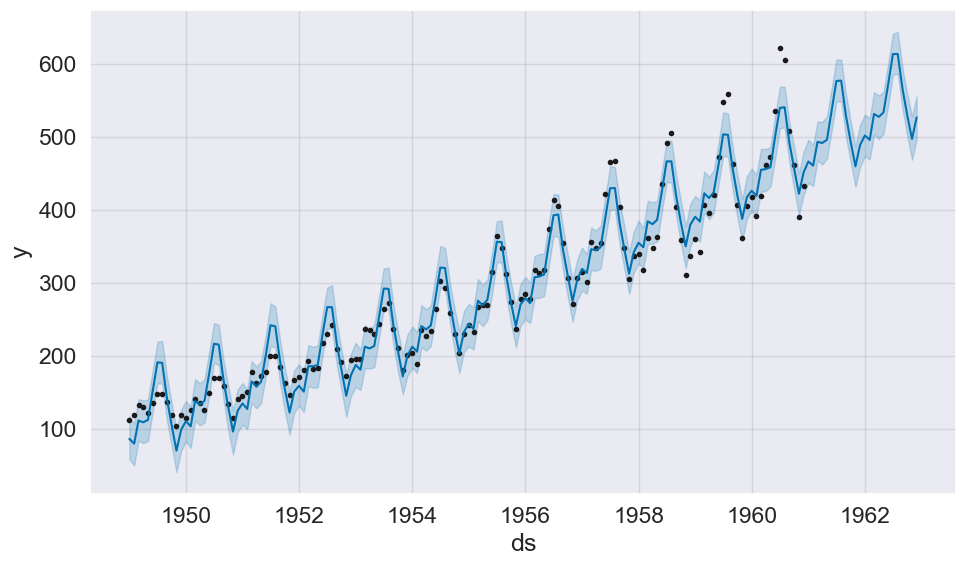

In [ ]:
from prophet import Prophet

df = pd.read_csv('data/air-passengers.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

17:03:58 - cmdstanpy - INFO - Chain [1] start processing
17:03:58 - cmdstanpy - INFO - Chain [1] done processing


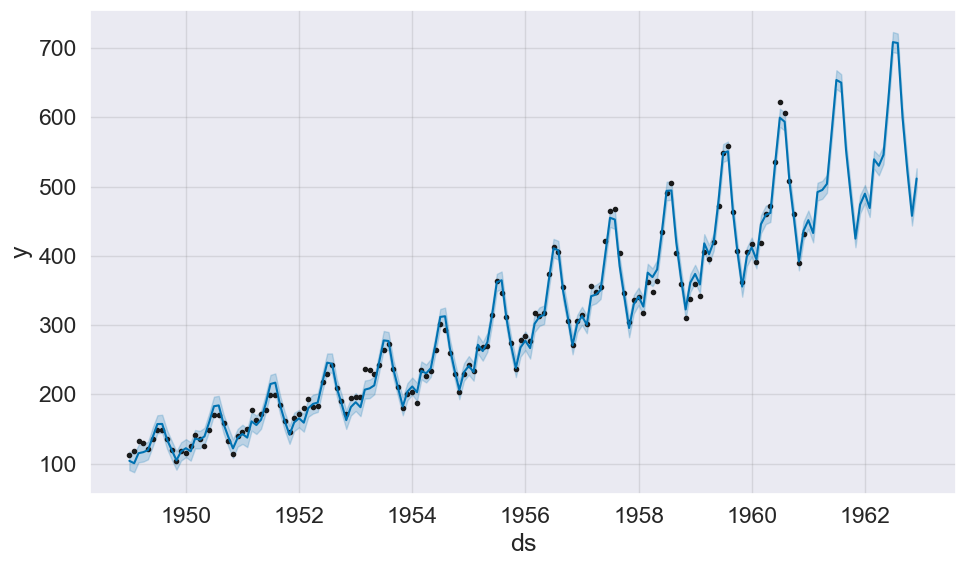

In [ ]:
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)